In [61]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Original Data')

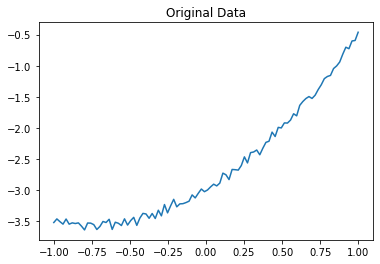

In [120]:
x_data = np.linspace(-1,1,100)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) + 1.5*x_data- 3+ noise # 真实函数
plt.plot(x_data, y_data)
plt.title('Original Data')


In [123]:
#添加占位符
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

In [124]:
#添加层
w1 = tf.Variable(tf.random_normal([1, 10]))
b1 = tf.Variable(tf.zeros([1, 10]) + 0.1)
ip1 = tf.matmul(xs, w1) + b1
out1 = tf.nn.relu(ip1)

In [125]:
#添加层
w2 = tf.Variable(tf.random_normal([10,1]))
b2 = tf.Variable(tf.zeros([1, 1]) + 0.1)
ip2 = tf.matmul(out1, w2) + b2
out2 = ip2

In [126]:
#设定损失函数
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-out2), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


In [127]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [128]:
for i in range(1000):
    _, loss_value = sess.run([train_step, loss], feed_dict={xs:x_data, ys:y_data})
    if i%50==0:
        print(loss_value)

8.43517
0.01854074
0.0117297
0.008796298
0.010820461
0.045331597
0.009006708
0.0055493037
0.005068772
0.005056006
0.0061667515
0.012113189
0.014613173
0.0072960085
0.0048727985
0.0043359934
0.0042735087
0.004446311
0.0050151474
0.006446412


In [129]:
pred = sess.run(out2, feed_dict={xs:x_data})

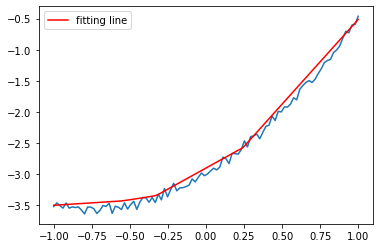

In [138]:
#拟合与原始数据对比
plt.plot(x_data, y_data)
plt.plot(x_data, pred,'r',label='fitting line')
plt.legend()
plt.show()

In [131]:
x_test = np.array([[-2.5],[-2],[-1],[-0.5],[0],[0.5],[1],[2],[2.5]])
y_true = np.square(x_test) + 1.5*x_test- 3 ;
y_sim = sess.run(out2, feed_dict={xs:x_test})

print(x_test)
#print(y_true)
#print(y_sim)

[[-2.5]
 [-2. ]
 [-1. ]
 [-0.5]
 [ 0. ]
 [ 0.5]
 [ 1. ]
 [ 2. ]
 [ 2.5]]


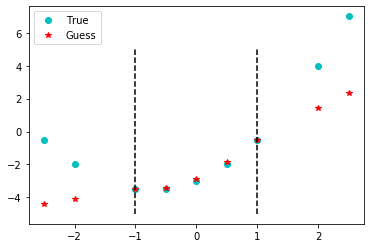

In [135]:
plt.plot(x_test,y_true,'co',label ='True')
plt.plot(x_test,y_sim,'r*',label='Guess')
plt.plot((-1,-1),(-5,5),'k--')
plt.plot((1,1),(-5,5),'k--')
plt.legend()

In [ ]:
# 结论： 
# 【1】： 基于神经网络的曲线拟合对源数据范围内的估计比较准确，对范围外的估计很不准确。